In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.optimize as opt
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier

In [61]:
df = pd.read_csv('student-mat.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [62]:
del df['G1']
del df['G2']

In [63]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,10


In [64]:
X = df.loc[:,df.columns != 'G3']
Y = df.loc[:,df.columns == 'G3']

In [65]:
temp_objt = X.select_dtypes(include='object')
temp_objt.head()
X_temp = pd.get_dummies(temp_objt)
X_temp.head()
X_temp.columns

Index(['school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no',
       'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no',
       'internet_yes', 'romantic_no', 'romantic_yes'],
      dtype='object')

In [66]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


In [67]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [68]:
X.drop(X.select_dtypes(['object']), inplace=True, axis=1)


C:\Users\VisualBI\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [69]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 13 columns):
age           395 non-null int64
Medu          395 non-null int64
Fedu          395 non-null int64
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
dtypes: int64(13)
memory usage: 40.2 KB


In [70]:
new_X = pd.concat([X,X_temp],axis=1)

In [71]:
new_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 56 columns):
age                  395 non-null int64
Medu                 395 non-null int64
Fedu                 395 non-null int64
traveltime           395 non-null int64
studytime            395 non-null int64
failures             395 non-null int64
famrel               395 non-null int64
freetime             395 non-null int64
goout                395 non-null int64
Dalc                 395 non-null int64
Walc                 395 non-null int64
health               395 non-null int64
absences             395 non-null int64
school_GP            395 non-null uint8
school_MS            395 non-null uint8
sex_F                395 non-null uint8
sex_M                395 non-null uint8
address_R            395 non-null uint8
address_U            395 non-null uint8
famsize_GT3          395 non-null uint8
famsize_LE3          395 non-null uint8
Pstatus_A            395 non-null uint8
Pstatus_T      

In [72]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [73]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(new_X, Y)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.7min finished
C:\Users\VisualBI\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [74]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [75]:
rfe_estimation = RFE(rf,n_features_to_select=10)
rfe_estimation = rfe_estimation.fit(new_X, Y)

C:\Users\VisualBI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
rfe_estimation.get_support
features_bool = np.array(rfe_estimation.support_)
features = np.array(new_X.columns)
result = features[features_bool]
print(result)

['age' 'Fedu' 'studytime' 'failures' 'famrel' 'freetime' 'goout' 'Walc'
 'health' 'absences']


In [78]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,20.000000


In [79]:
df_10 = df[['age', 'Medu', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Walc', 'health', 'absences']].copy()

In [80]:
df_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 10 columns):
age          395 non-null int64
Medu         395 non-null int64
studytime    395 non-null int64
failures     395 non-null int64
famrel       395 non-null int64
freetime     395 non-null int64
goout        395 non-null int64
Walc         395 non-null int64
health       395 non-null int64
absences     395 non-null int64
dtypes: int64(10)
memory usage: 30.9 KB


In [81]:
df_10.describe()

,age,Medu,studytime,failures,famrel,freetime,goout,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.035443,0.334177,3.944304,3.235443,3.108861,2.291139,3.554430,5.708861
std,1.276043,1.094735,0.839240,0.743651,0.896659,0.998862,1.113278,1.287897,1.390303,8.003096
min,15.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,0.000000,4.000000,3.000000,3.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,2.000000,0.000000,5.000000,4.000000,4.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [87]:
################ binary classification of G3 i.e target variable #########
def f(row):
    if row['G3'] > 10 :
        val = 1
    else:
        val = 0
    return val
df['Grade'] = df.apply(f, axis=1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,6,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,10,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,10,0


In [88]:
## We select the 10 features derived after feature selection technique instead of random selection
## Splitting the data into X and Y

In [89]:
X = df_10[['age', 'Medu', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Walc', 'health', 'absences']]
Y= df['Grade']
## Randomly grouping data into train and test

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 5)

Text(0,0.5,'absences')

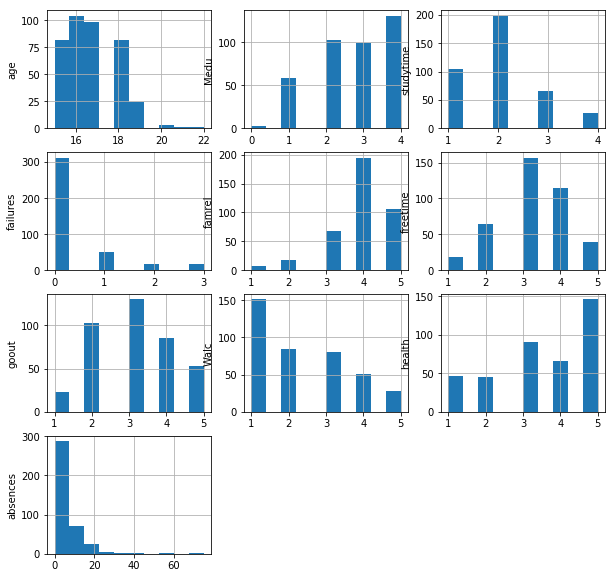

In [135]:
## The Data is clean as there are no null values
## Plotting Histograms for the variables to see the distribution of data
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
plt.title('Histograms')
plt.subplot(4,3,1)
df['age'].hist()
plt.ylabel('age')
plt.subplot(4,3,2)
df['Medu'].hist()
plt.ylabel('Medu')
plt.subplot(4,3,3)
df['studytime'].hist()
plt.ylabel('studytime')
plt.subplot(4,3,4)
df['failures'].hist()
plt.ylabel('failures')
plt.subplot(4,3,5)
df['famrel'].hist()
plt.ylabel('famrel')
plt.subplot(4,3,6)
df['freetime'].hist()
plt.ylabel('freetime')
plt.subplot(4,3,7)
df['goout'].hist()
plt.ylabel('goout')
plt.subplot(4,3,8)
df['Walc'].hist()
plt.ylabel('Walc')
plt.subplot(4,3,9)
df['health'].hist()
plt.ylabel('health')
plt.subplot(4,3,10)
df['absences'].hist()
plt.ylabel('absences')

In [91]:
### SCALING 
## Few variables are skewed and have outliers. Hence, we perform various types of scaling to check which gives the best results 
## for a linear regression 

In [97]:
## Without Scaling
linreg1 = LinearRegression().fit(X_train, Y_train)
print('The training score without scaling is :',linreg1.score(X_train, Y_train))
print('The testing score without scaling is :',linreg1.score(X_test, Y_test))
print(" ")

# Normalization
normalized_X_train = normalize(X_train)
normalized_X_test = normalize(X_test)
linreg2 = LinearRegression().fit(normalized_X_train, Y_train)
print('The training score with normalization is :',linreg2.score(normalized_X_train, Y_train))
print('The testing score with normalization is',linreg2.score(normalized_X_test, Y_test))
print(" ")

# MinMax Scaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
linreg3 = LinearRegression().fit(X_train_scaled, Y_train)
print('The training score with MinMax Scaler is',linreg3.score(X_train_scaled, Y_train))
print('The testing score with MinMax Scaler is',linreg3.score(X_test_scaled, Y_test))
print(" ")

# Standardized
standardized_X_train = scale(X_train)
standardized_X_test = scale(X_test)
linreg4 = LinearRegression().fit(standardized_X_train, Y_train)
print('The training score with Standardization  is',linreg4.score(standardized_X_train, Y_train))
print('The testing score with Standardization  is',linreg4.score(standardized_X_test, Y_test))
print(" ")

The training score without scaling is : 0.15638326100295363
The testing score without scaling is : 0.031156135484795677
 
The training score with normalization is : 0.15901409890395124
The testing score with normalization is 0.03729454204864402
 
The training score with MinMax Scaler is 0.15638326100295374
The testing score with MinMax Scaler is 0.031156135484794678
 
The training score with Standardization  is 0.15638326100295374
The testing score with Standardization  is 0.03569221995251648
 


In [93]:
## As the accuracy of Normalization is better than the other scaling techniques, we will use the normalized train and test 
##  dataset to run out Classification algorithms

In [99]:
## renaming normalized variables back to X_train and X_test 
X_train = normalized_X_train
X_test = normalized_X_test

Model Accuracy : 49.495%


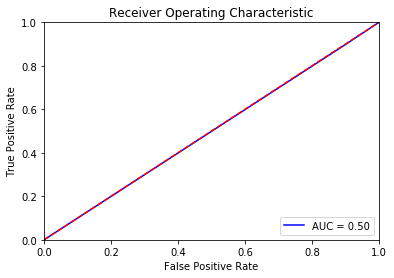

ROC_AUC Score : 0.4989795918367347


In [103]:
## 1st Algorithm --> SVM classification with linear kernel 

model_svm1 = svm.SVC(kernel='linear', C=1, gamma=1)

## model fitting
model_svm1.fit(X_train, Y_train)
model_svm1.score(X_train, Y_train)

#Predict Output
predictions= model_svm1.predict(X_test)

#Print accuracy
accuracy = metrics.accuracy_score(Y_test,predictions)
print ("Model Accuracy : %s" % "{0:.3%}".format(accuracy))


## ROC Error metrics:

fpr, tpr, threshold = metrics.roc_curve(Y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC_AUC Score : " + str(roc_auc) )


Model Accuracy : 52.525%


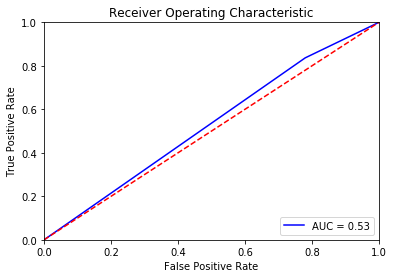

ROC_AUC Score : 0.5283673469387755


In [104]:
## SVM 2 --> SVM classification with rbf kernel 

model_svm2 = svm.SVC(kernel='rbf', C=1, gamma=1)

## model fitting
model_svm2.fit(X_train, Y_train)
model_svm2.score(X_train, Y_train)

#Predict Output
predictions= model_svm2.predict(X_test)

#Print accuracy
accuracy = metrics.accuracy_score(Y_test,predictions)
print ("Model Accuracy : %s" % "{0:.3%}".format(accuracy))


## ROC Error metrics:

fpr, tpr, threshold = metrics.roc_curve(Y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC_AUC Score : " + str(roc_auc) )


In [105]:
## There is a minor difference in the model accuracy and the ROC_AUC score when 'rbf' kernel is used

Model Accuracy : 49.495%


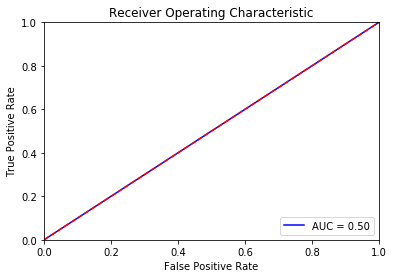

ROC_AUC Score : 0.5


In [106]:
## SVM 3 --> SVM classification with sigmoid kernel 

model_svm3 = svm.SVC(kernel='sigmoid', C=1, gamma=1)

## model fitting
model_svm3.fit(X_train, Y_train)
model_svm3.score(X_train, Y_train)

#Predict Output
predictions= model_svm3.predict(X_test)

#Print accuracy
accuracy = metrics.accuracy_score(Y_test,predictions)
print ("Model Accuracy : %s" % "{0:.3%}".format(accuracy))


## ROC Error metrics:

fpr, tpr, threshold = metrics.roc_curve(Y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC_AUC Score : " + str(roc_auc) )


In [107]:
## The performance and error metrics results of SVM remain same across all the 3 kernel changes

Model Train Accuracy : 99.662%
Model Test Accuracy : 51.515%


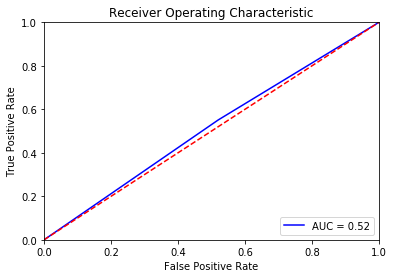

ROC_AUC Score : 0.5155102040816326


In [108]:
## 2nd Algorithm --> DT1
## Create Decision Treee with 'Gini' metric without pruning  

## Impurity measure are quite consistent with each other... Indeed, the strategy used to prune the tree 
## has a greater impact on the final tree than the choice of impurity measure.
## We choose Gini index as it focuses more on correct Classification than exploration (Entropy) 
## Also, Gini index provides better performance

model_dt1 = DecisionTreeClassifier(criterion='gini')


## model fitting
model_dt1.fit(X_train, Y_train)
model_dt1.score(X_train, Y_train)


#Predict Output
predictions= model_dt1.predict(X_test)

#Print train accuracy
train_accuracy = model_dt1.score(X_train,Y_train)
print ("Model Train Accuracy : %s" % "{0:.3%}".format(train_accuracy))

#Print test accuracy
test_accuracy = metrics.accuracy_score(Y_test,predictions)
print ("Model Test Accuracy : %s" % "{0:.3%}".format(test_accuracy))


## ROC Error metrics:

fpr, tpr, threshold = metrics.roc_curve(Y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC_AUC Score : " + str(roc_auc) )

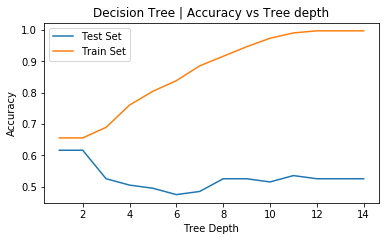

In [109]:

accuracy_test=[None]*15
accuracy_train=[None]*15
count=0
for max_depth in range(1,15):
    Decision_tree= DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    Decision_tree.fit(X_train, Y_train)
    accuracy_train[count]=Decision_tree.score(X_train, Y_train)
    accuracy_test[count]=Decision_tree.score(X_test, Y_test)
    count+=1

ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(range(1,16),accuracy_test)
ax1.plot(range(1,16),accuracy_train)


plt.title("Decision Tree | Accuracy vs Tree depth")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")

plt.legend(['Test Set','Train Set'])


In [112]:
## The accuracy of the train dataset increases as the tree depth increases and eventually the it reaches to 1, which 
## results to the overfitting of the model. 

## The accuracy of the test dataset increases as the depth increases but after certain depth is starts to decreases, 
## which is expected. From the graph of accuracy as the function of tree depth, it as clear that for this dataset 
## the optimum tree depth is 8. 

Model Train Accuracy : 91.554%
Model Test Accuracy : 52.525%


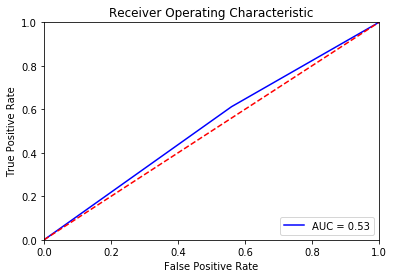

ROC_AUC Score : 0.5261224489795918


In [125]:
## 2nd Algorithm --> DT2 (with depth = 8)
## Create Decision Treee with 'Gini' metric with pruning for better performance


model_dt2 = DecisionTreeClassifier(criterion='gini',random_state=0, max_depth=8)


## model fitting
model_dt2.fit(X_train, Y_train)
model_dt2.score(X_train, Y_train)


#Predict Output
predictions= model_dt2.predict(X_test)

#Print train accuracy
train_accuracy = model_dt2.score(X_train,Y_train)
print ("Model Train Accuracy : %s" % "{0:.3%}".format(train_accuracy))

#Print test accuracy
test_accuracy = metrics.accuracy_score(Y_test,predictions)
print ("Model Test Accuracy : %s" % "{0:.3%}".format(test_accuracy))


## ROC Error metrics:

fpr, tpr, threshold = metrics.roc_curve(Y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC_AUC Score : " + str(roc_auc) )




In [119]:
### The performance results after pruning increase

Model Train Accuracy : 99.662%
Model Test Accuracy : 54.545%


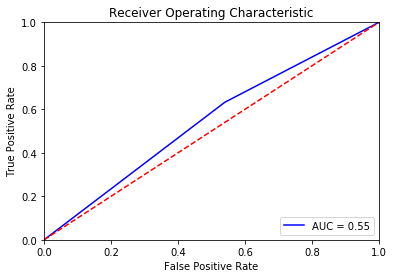

ROC_AUC Score : 0.5463265306122449


In [127]:
## 3rd Algorithm --> Boosting Ensemble methods with Decision tree without pruning

Decision_tree= DecisionTreeClassifier( criterion='gini')
model_boost = AdaBoostClassifier(base_estimator=Decision_tree)


## model fitting
model_boost.fit(X_train, Y_train)
model_boost.score(X_train, Y_train)


#Predict Output
predictions= model_boost.predict(X_test)

#Print train accuracy
train_accuracy = model_boost.score(X_train,Y_train)
print ("Model Train Accuracy : %s" % "{0:.3%}".format(train_accuracy))

#Print test accuracy
test_accuracy = metrics.accuracy_score(Y_test,predictions)
print ("Model Test Accuracy : %s" % "{0:.3%}".format(test_accuracy))


## ROC_AUC Error metrics:

fpr, tpr, threshold = metrics.roc_curve(Y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC_AUC Score : " + str(roc_auc) )

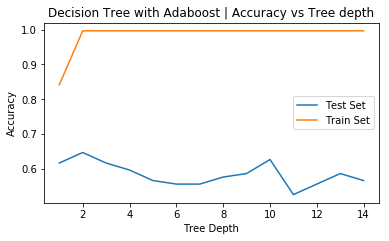

In [128]:
accuracy_test=[None]*15
accuracy_train=[None]*15
count=0
for max_depth in range(1,15):
    Decision_tree= DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    Adaboost_Classifier = AdaBoostClassifier(base_estimator=Decision_tree)
    Adaboost_Classifier.fit(X_train, Y_train)
    accuracy_train[count]=Adaboost_Classifier.score(X_train, Y_train)
    accuracy_test[count]=Adaboost_Classifier.score(X_test, Y_test)
    count+=1
    

ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(range(1,16),accuracy_test)
ax1.plot(range(1,16),accuracy_train)


plt.title("Decision Tree with Adaboost | Accuracy vs Tree depth")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")

plt.legend(['Test Set','Train Set'])

In [129]:
## The accuracy of the train dataset increases as the tree depth increases and eventually the it reaches to 1, which 
## results to the overfitting of the model. 

## The accuracy of the test dataset increases as the depth increases but after certain depth is starts to decreases, 
## which is expected. From the graph of accuracy as the function of tree depth, it as clear that for this dataset 
## the optimum tree depth is 2. 

Model Train Accuracy : 99.662%
Model Test Accuracy : 64.646%


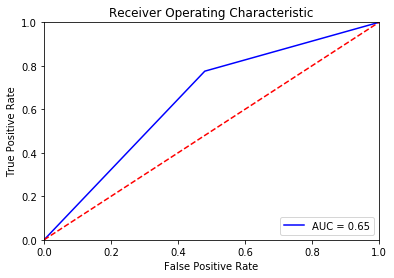

ROC_AUC Score : 0.6477551020408163


In [134]:
## 3rd Algorithm --> Boosting Ensemble methods with Decision tree with pruning considering depth as 2

Decision_tree= DecisionTreeClassifier( criterion='gini', max_depth=2)
model_boost2 = AdaBoostClassifier(base_estimator=Decision_tree)


## model fitting
model_boost2.fit(X_train, Y_train)
model_boost2.score(X_train, Y_train)


#Predict Output
predictions= model_boost2.predict(X_test)

#Print train accuracy
train_accuracy = model_boost2.score(X_train,Y_train)
print ("Model Train Accuracy : %s" % "{0:.3%}".format(train_accuracy))

#Print test accuracy
test_accuracy = metrics.accuracy_score(Y_test,predictions)
print ("Model Test Accuracy : %s" % "{0:.3%}".format(test_accuracy))


## ROC_AUC Error metrics:

fpr, tpr, threshold = metrics.roc_curve(Y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC_AUC Score : " + str(roc_auc) )

In [ ]:
## We can see that the Model accuracy has increased considerably from 54% to 64% improving the performance after pruning/boosting.